# Table of contents
1. PII(Personal Identifiable Information)
2. Geographic Analysis
3. Activity flag for customers
4. Customer profile
5. Distribution of profiles
6. Descriptive analytics of customer profiles
7. Searching a link between customer profiles and Regions&Departments
8. Export dataframes

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path
path = r'C:\Users\pinto\OneDrive\Documenti\1-2024-Instacart Basket Analysis'

In [3]:
# Import ords_prods_grouped.pkl
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data.pkl')) 

# 1. PII(Personal Identifiable Information)

2.
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Check dataframe
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0_ords_prods   int64   
 2   order_id                int64   
 3   user_id                 object  
 4   eval_set                object  
 5   order_number            int64   
 6   order_dow               int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   product_id              int64   
 10  add_to_cart_order       int64   
 11  reordered               int64   
 12  _merge                  category
 13  Unnamed: 0_prods        int64   
 14  product_name            object  
 15  aisle_id                int64   
 16  department_id           int64   
 17  prices                  float64 
 18  merge_indicator         category
 19  price_range_loc         object  
 20  busiest_day             object  
 21  busies

In this dataframe, there are some columns referring to personal information: "First Name", "Surname", "Gender", "State", "Age", "number_of_dependants", "family_status" and "income". There's no reference to sensitive information, though, such as e-mail and/or physical addressess or phone numbers, so there's no way that the information in this dataframe can be traced back to a particular person, hence we aren't working with PII.

# 2. Geographic analysis

3. 
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [4]:
# Create "Region" column and segmentate it in "Northeast"
df_instacart.loc[(df_instacart['State'] == 'Maine')|
                 (df_instacart['State'] == 'New Hampshire')|
                 (df_instacart['State'] == 'Vermont')|
                 (df_instacart['State'] == 'Massachusetts')|
                 (df_instacart['State'] == 'Rhode Island')|
                 (df_instacart['State'] == 'Connecticut')|
                 (df_instacart['State'] == 'New York')|
                 (df_instacart['State'] == 'Pennsylvania')|
                 (df_instacart['State'] == 'New Jersey'),
                 'Region'] = 'Northeast'

In [5]:
# Create "Region" column and segmentate it in "Midwest"
df_instacart.loc[(df_instacart['State'] == 'Wisconsin')|
                 (df_instacart['State'] == 'Michigan')|
                 (df_instacart['State'] == 'Illinois')|
                 (df_instacart['State'] == 'Indiana')|
                 (df_instacart['State'] == 'Ohio')|
                 (df_instacart['State'] == 'North Dakota')|
                 (df_instacart['State'] == 'South Dakota')|
                 (df_instacart['State'] == 'Nebraska')|
                 (df_instacart['State'] == 'Kansas')|
                 (df_instacart['State'] == 'Minnesota')|
                 (df_instacart['State'] == 'Iowa')|
                 (df_instacart['State'] == 'Missouri'),
                 'Region'] = 'Midwest'

In [6]:
# Create "Region" column and segmentate it in "South"
df_instacart.loc[(df_instacart['State'] == 'Delaware')|
                 (df_instacart['State'] == 'Maryland')|
                 (df_instacart['State'] == 'District of Columbia')|
                 (df_instacart['State'] == 'Virginia')|
                 (df_instacart['State'] == 'West Virginia')|
                 (df_instacart['State'] == 'North Carolina')|
                 (df_instacart['State'] == 'South Carolina')| 
                 (df_instacart['State'] == 'Georgia')|
                 (df_instacart['State'] == 'Florida')|
                 (df_instacart['State'] == 'Kentucky')|
                 (df_instacart['State'] == 'Tennessee')|
                 (df_instacart['State'] == 'Mississippi')|
                 (df_instacart['State'] == 'Alabama')|
                 (df_instacart['State'] == 'Oklahoma')|
                 (df_instacart['State'] == 'Texas')|
                 (df_instacart['State'] == 'Arkansas')| 
                 (df_instacart['State'] == 'Louisiana'),
                 'Region'] = 'South'

In [7]:
# Create "Region" column and segmentate it in "West"
df_instacart.loc[(df_instacart['State'] == 'Idaho')|
                 (df_instacart['State'] == 'Montana')|
                 (df_instacart['State'] == 'Wyoming')|
                 (df_instacart['State'] == 'Virginia')|
                 (df_instacart['State'] == 'Nevada')|
                 (df_instacart['State'] == 'Utah')|
                 (df_instacart['State'] == 'Colorado')| 
                 (df_instacart['State'] == 'Arizona')|
                 (df_instacart['State'] == 'New Mexico')|
                 (df_instacart['State'] == 'Alaska')|
                 (df_instacart['State'] == 'Washington')|
                 (df_instacart['State'] == 'Oregon')|
                 (df_instacart['State'] == 'California')|
                 (df_instacart['State'] == 'Hawaii'),
                 'Region'] = 'West'

In [9]:
# Check result for Northeast region
df_instacart.loc[df_instacart['Region'] == 'Northeast'].head()

Unnamed: 0.1  Unnamed: 0_ords_prods  order_id user_id eval_set  \
1444          1608                   1608   1403849     109    prior   
1445          1610                   1610   3116901     109    prior   
1446          1611                   1611   1382150     109    prior   
1447          1610                   1610   3116901     109    prior   
1448          1608                   1608   1403849     109    prior   

      order_number  order_dow  order_hour_of_day  days_since_prior_order  \
1444             3          3                 17                     9.0   
1445             5          0                  7                    26.0   
1446             6          1                  9                    15.0   
1447             5          0                  7                    26.0   
1448             3          3                 17                     9.0   

      product_id  ...  Surname  Gender        State  Age date_joined  \
1444         196  ...  Mendoza  Female  Connecticut   67   7/29/2018   
1445       47144  ...  Mendoza  Female  Connecticut   67   7/29/2018   
1446        5450  ...  Mendoza  Female  Connecticut   67   7/29/2018   
1447        9387  ...  Mendoza  Female  Connecticut   67   7/29/2018   
1448       11777  ...  Mendoza  Female  Connecticut   67   7/29/2018   

      number_of_dependants  family_status  income exists     Region  
1444                     1        married   41805   both  Northeast  
1445                     1        married   41805   both  Northeast  
1446                     1        married   41805   both  Northeast  
1447                     1        married   41805   both  Northeast  
1448                     1        married   41805   both  Northeast  

[5 rows x 39 columns]

In [10]:
# Check result for Midwest region
df_instacart.loc[df_instacart['Region'] == 'Midwest'].head()

Unnamed: 0.1  Unnamed: 0_ords_prods  order_id user_id eval_set  \
59           144                    144   2968173      15    prior   
60           146                    146   1870022      15    prior   
61           147                    147   1911383      15    prior   
62           150                    150   2715276      15    prior   
63           151                    151    487368      15    prior   

    order_number  order_dow  order_hour_of_day  days_since_prior_order  \
59            15          1                  9                     7.0   
60            17          2                 16                     8.0   
61            18          2                 11                     7.0   
62            21          1                  9                     7.0   
63            22          1                 10                    14.0   

    product_id  ...  Surname  Gender    State  Age date_joined  \
59         196  ...  Woodard  Female  Indiana   69    6/3/2019   
60         196  ...  Woodard  Female  Indiana   69    6/3/2019   
61         196  ...  Woodard  Female  Indiana   69    6/3/2019   
62         196  ...  Woodard  Female  Indiana   69    6/3/2019   
63         196  ...  Woodard  Female  Indiana   69    6/3/2019   

    number_of_dependants     family_status  income exists   Region  
59                     0  divorced/widowed   54313   both  Midwest  
60                     0  divorced/widowed   54313   both  Midwest  
61                     0  divorced/widowed   54313   both  Midwest  
62                     0  divorced/widowed   54313   both  Midwest  
63                     0  divorced/widowed   54313   both  Midwest  

[5 rows x 39 columns]

In [11]:
# Check result for South region
df_instacart.loc[df_instacart['Region'] == 'South'].head()

Unnamed: 0.1  Unnamed: 0_ords_prods  order_id user_id eval_set  \
0             0                      0   2539329       1    prior   
1             1                      1   2398795       1    prior   
2             2                      2    473747       1    prior   
3             3                      3   2254736       1    prior   
4             4                      4    431534       1    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             1          2                  8                     NaN   
1             2          3                  7                    15.0   
2             3          3                 12                    21.0   
3             4          4                  7                    29.0   
4             5          4                 15                    28.0   

   product_id  ...  Surname  Gender    State  Age date_joined  \
0         196  ...   Nguyen  Female  Alabama   31   2/17/2019   
1         196  ...   Nguyen  Female  Alabama   31   2/17/2019   
2         196  ...   Nguyen  Female  Alabama   31   2/17/2019   
3         196  ...   Nguyen  Female  Alabama   31   2/17/2019   
4         196  ...   Nguyen  Female  Alabama   31   2/17/2019   

   number_of_dependants  family_status  income exists Region  
0                     3        married   40423   both  South  
1                     3        married   40423   both  South  
2                     3        married   40423   both  South  
3                     3        married   40423   both  South  
4                     3        married   40423   both  South  

[5 rows x 39 columns]

In [12]:
# Check result for West region
df_instacart.loc[df_instacart['Region'] == 'West'].head()

Unnamed: 0.1  Unnamed: 0_ords_prods  order_id user_id eval_set  \
335           232                    232   1573906      21    prior   
336           255                    255   3341737      21    prior   
337           236                    236   1082944      21    prior   
338           238                    238    774475      21    prior   
339           241                    241     77791      21    prior   

     order_number  order_dow  order_hour_of_day  days_since_prior_order  \
335            10          3                 10                     6.0   
336            33          1                 12                    30.0   
337            14          1                  9                    10.0   
338            16          1                 11                     7.0   
339            19          3                  9                     8.0   

     product_id  ...  Surname  Gender    State  Age date_joined  \
335         196  ...     Carr    Male  Montana   71   6/18/2019   
336       49235  ...     Carr    Male  Montana   71   6/18/2019   
337       47766  ...     Carr    Male  Montana   71   6/18/2019   
338       47766  ...     Carr    Male  Montana   71   6/18/2019   
339       47766  ...     Carr    Male  Montana   71   6/18/2019   

     number_of_dependants     family_status  income exists Region  
335                     0  divorced/widowed  124643   both   West  
336                     0  divorced/widowed  124643   both   West  
337                     0  divorced/widowed  124643   both   West  
338                     0  divorced/widowed  124643   both   West  
339                     0  divorced/widowed  124643   both   West  

[5 rows x 39 columns]

In [16]:
# Value count by regions
df_instacart['Region'].value_counts()

Region
South        10159535
West          8942520
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

Determine whether there’s a difference in spending habits between the different U.S. regions.

In [17]:
# Create crosstab for Northeast region with "spending_flag" column
crosstab = pd.crosstab(df_instacart['Region'], df_instacart['spending_flag'], dropna = False)

In [18]:
# Export to Excel 
crosstab.to_clipboard()

Region	        High spenders	Low spenders	Percentage of number of spenders over the total   Percentage of High spenders
Midwest	         156,129	      7,447,681 	                  23%	                                    2.05%
Northeast	     108,343	      5,620,004	                  	  18%	                                    1.89%
South	         194,083	      9,965,452	                 	  31%	                                    1.91%
West	         176,906	      8,765,614	                  	  28%	                                    1.98%

The percentage of high spenders is similar in all US Regions, being around 2%. The difference between the regions lies mostly in the number of customers over the total. In fact, most of the customers are located in the South(31%) and West(28%), followed by Midwest(23%) and Northeast(18%).

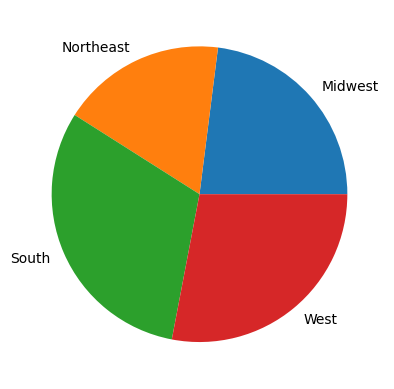

In [11]:
# Plot data on a pie chart
y = np.array([23, 18, 31, 28])
mylabels = ["Midwest", "Northeast", "South", "West"]

plt.pie(y, labels = mylabels)
plt.show() 

# 3. Activity flag for customers

4. 
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [8]:
# Create flag for low-activity customers
df_instacart.loc[df_instacart['max_order'] < 5, 'activity_flag'] = 'Low-activity customer'

In [9]:
# Check the result
df_instacart['activity_flag'].value_counts(dropna = False)

activity_flag
nan                      30992664
Low-activity customer     1441548
Name: count, dtype: int64

In [9]:
# Create new dataframe that doesn't have low activity customers in it
df_instacart_2 = df_instacart.drop(columns = ['activity_flag'])

In [10]:
# Check the result
df_instacart_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0_ords_prods   int64   
 2   order_id                int64   
 3   user_id                 object  
 4   eval_set                object  
 5   order_number            int64   
 6   order_dow               int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   product_id              int64   
 10  add_to_cart_order       int64   
 11  reordered               int64   
 12  _merge                  category
 13  Unnamed: 0_prods        int64   
 14  product_name            object  
 15  aisle_id                int64   
 16  department_id           int64   
 17  prices                  float64 
 18  merge_indicator         category
 19  price_range_loc         object  
 20  busiest_day             object  
 21  busies

In [12]:
# Export newly created dataframe
df_instacart_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_data_2.pkl'))

# 4. Customer profile

5. 
Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

In [10]:
# Create age flag
df_instacart_2.loc[(df_instacart_2['Age'] <= 35) & (df_instacart_2['Age'] > 18), 'age_flag'] = 'Young' 
df_instacart_2.loc[(df_instacart_2['Age'] <= 60) & (df_instacart_2['Age'] > 36), 'age_flag'] = 'Middle-aged' 
df_instacart_2.loc[df_instacart_2['Age'] > 61, 'age_flag'] = 'Elderly' 

In [14]:
# Check the result
df_instacart_2['age_flag'].value_counts(dropna = False)

age_flag
Middle-aged    12202968
Elderly        10103989
Young           8653874
nan             1473381
Name: count, dtype: int64

In [12]:
# Check values for income
df_instacart_2['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [11]:
# Create income flag
df_instacart_2.loc[(df_instacart_2['income'] <= 66998) & (df_instacart_2['income'] > 25900), 'income_flag'] = 'Low income' 
df_instacart_2.loc[(df_instacart_2['income'] <= 127907) & (df_instacart_2['income'] > 66997), 'income_flag'] = 'Average income' 
df_instacart_2.loc[df_instacart_2['income'] > 127908, 'income_flag'] = 'High income' 

In [19]:
# Check the result
df_instacart_2['income_flag'].value_counts(dropna = False)

income_flag
Average income    16216931
High income        8108468
Low income         8108326
nan                    487
Name: count, dtype: int64

In [8]:
# Profile order_dow
df_instacart_2['order_dow'].value_counts()

order_dow
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [14]:
# Profile order_hour_of_day
df_instacart_2['order_hour_of_day'].value_counts()

order_hour_of_day
10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: count, dtype: int64

In [15]:
# Profile number_of_dependants
df_instacart_2['number_of_dependants'].value_counts()

number_of_dependants
3    8142318
0    8105197
2    8098387
1    8088310
Name: count, dtype: int64

In [16]:
# Check departments
df_instacart_2['department_id'].value_counts()

department_id
4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [12]:
# Create a profile for different types of customer based on "Age" and "number_of_dependants"
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Middle-aged') & (df_instacart_2['number_of_dependants'] == 0), 'type_of_customer'] = 'Single adult'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Young') & (df_instacart_2['number_of_dependants'] == 0), 'type_of_customer'] = 'Young single'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Young') & (df_instacart_2['number_of_dependants'] > 0), 'type_of_customer'] = 'Young parent'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Middle-aged') & (df_instacart_2['number_of_dependants'] > 0), 'type_of_customer'] = 'Adult parent' 
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Elderly') & (df_instacart_2['number_of_dependants'] == 0), 'type_of_customer'] = 'Lone elderly' 
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Elderly') & (df_instacart_2['number_of_dependants'] > 0), 'type_of_customer'] = 'Elderly with children' 

In [20]:
# Check the result
df_instacart_2['type_of_customer'].value_counts(dropna = False)

type_of_customer
Adult parent             9154064
Elderly with children    7581666
Young parent             6500937
Single adult             3048904
Lone elderly             2522323
Young single             2152937
nan                      1473381
Name: count, dtype: int64

In [13]:
# Create a profile for different types of customer based on "Age" and "income"
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Young') & (df_instacart_2['income_flag'] == 'Low income'), 'profile_of_customer'] = 'Low income young'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Middle-aged') & (df_instacart_2['income_flag'] == 'Low income'), 'profile_of_customer'] = 'Low income adult'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Elderly') & (df_instacart_2['income_flag'] == 'Low income'), 'profile_of_customer'] = 'Low income elderly'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Young') & (df_instacart_2['income_flag'] == 'Average income'), 'profile_of_customer'] = 'Average income young'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Middle-aged') & (df_instacart_2['income_flag'] == 'Average income'), 'profile_of_customer'] = 'Average income adult'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Elderly') & (df_instacart_2['income_flag'] == 'Average income'), 'profile_of_customer'] = 'Average income elderly'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Young') & (df_instacart_2['income_flag'] == 'High income'), 'profile_of_customer'] = 'High income young'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Middle-aged') & (df_instacart_2['income_flag'] == 'High income'), 'profile_of_customer'] = 'High income adult'
df_instacart_2.loc[(df_instacart_2['age_flag'] == 'Elderly') & (df_instacart_2['income_flag'] == 'High income'), 'profile_of_customer'] = 'High income elderly'

In [35]:
# Check the result
df_instacart_2['profile_of_customer'].value_counts(dropna = False)

profile_of_customer
Average income adult      5973963
Average income elderly    4903948
Average income young      4576926
Low income young          3980673
High income adult         3928858
High income elderly       3878161
Low income adult          2299660
nan                       1473868
Low income elderly        1321880
High income young           96275
Name: count, dtype: int64

In [14]:
# Combine the customer profiles
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Single adult') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income single adult'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young single') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income young single'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young parent') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income young parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Adult parent') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income adult parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Lone elderly') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income lone elderly'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Elderly with children') & (df_instacart_2['income_flag'] == 'Low income'), 'customer_profile'] = 'Low income elderly with children'

df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Single adult') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income single adult'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young single') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income young single'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young parent') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income young parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Adult parent') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income adult parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Lone elderly') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income lone elderly'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Elderly with children') & (df_instacart_2['income_flag'] == 'Average income'), 'customer_profile'] = 'Average income elderly with children'

df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Single adult') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income single adult'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young single') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income young single'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Young parent') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income young parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Adult parent') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income adult parent'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Lone elderly') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income lone elderly'
df_instacart_2.loc[(df_instacart_2['type_of_customer'] == 'Elderly with children') & (df_instacart_2['income_flag'] == 'High income'), 'customer_profile'] = 'High income elderly with children'

In [23]:
# Check results 
df_instacart_2['customer_profile'].value_counts(dropna = False)

customer_profile
Average income adult parent             4497227
Average income elderly with children    3660405
Average income young parent             3440985
Low income young parent                 2987247
High income adult parent                2933285
High income elderly with children       2921404
Low income adult parent                 1723065
Average income single adult             1476736
nan                                     1473868
Average income lone elderly             1243543
Average income young single             1135941
Low income elderly with children         999857
High income single adult                 995573
Low income young single                  993426
High income lone elderly                 956757
Low income single adult                  576595
Low income lone elderly                  322023
High income young parent                  72705
High income young single                  23570
Name: count, dtype: int64

# 5. Distribution of profiles

6.
Create an appropriate visualization to show the distribution of profiles.

<Axes: xlabel='customer_profile'>

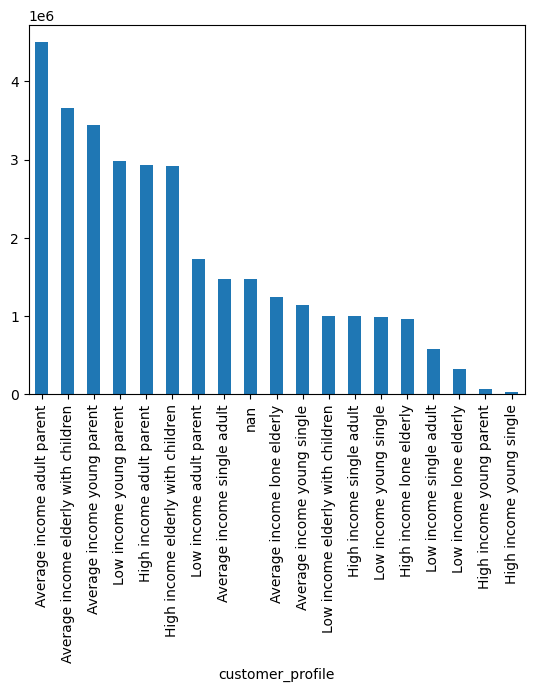

In [25]:
# Create a bar chart for customer profiles
df_instacart_2['customer_profile'].value_counts().plot.bar()

As it's easy to see from the bar chart above, the biggest group of Instacart clients are people between the age of 36 and 60, having an average income and at least one child, followed by average income elderly parents and average income young parents. 

To put it more simply, the most affectionate Instacart customers are people from all age groups having at least one child and a yearly income between 66997 and 127907 dollars.

The less common types of customers are by far both singles and parents under the age of 35 with an high income. 

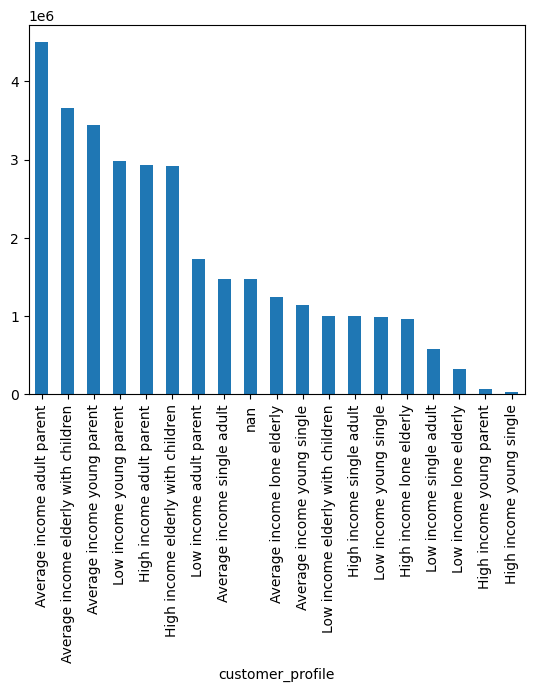

In [26]:
bar_customers = df_instacart_2['customer_profile'].value_counts().plot.bar()

In [27]:
# Save figure in the visualization folder 
bar_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customers.png'))

# 6. Descriptive analytics of customer profiles

7.
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [29]:
# Group 'customer_profile' column by 'days_since_prior_order' 
df_instacart_2.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                       mean  min   max
customer_profile                                                      
Average income adult parent                       11.018659  0.0  30.0
Average income elderly with children              11.046424  0.0  30.0
Average income lone elderly                       10.960951  0.0  30.0
Average income single adult                       11.015903  0.0  30.0
Average income young parent                       11.060659  0.0  30.0
Average income young single                       11.132496  0.0  30.0
High income adult parent                          11.146457  0.0  30.0
High income elderly with children                 10.983077  0.0  30.0
High income lone elderly                          10.990966  0.0  30.0
High income single adult                          10.959690  0.0  30.0
High income young parent                          10.456596  0.0  30.0
High income young single                           9.753589  0.0  30.0
Low income adult parent                           11.387152  0.0  30.0
Low income elderly with children                  11.566098  0.0  30.0
Low income lone elderly                           11.704916  0.0  30.0
Low income single adult                           11.212101  0.0  30.0
Low income young parent                           11.164494  0.0  30.0
Low income young single                           11.238417  0.0  30.0
nan                                               11.156500  0.0  30.0

In [38]:
# Group 'profile_of_customer' column by 'days_since_prior_order' 
df_instacart_2.groupby('profile_of_customer').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                         mean  min   max
profile_of_customer                                     
Average income adult                11.017978  0.0  30.0
Average income elderly              11.024746  0.0  30.0
Average income young                11.078494  0.0  30.0
High income adult                   11.099100  0.0  30.0
High income elderly                 10.985024  0.0  30.0
High income young                   10.283801  0.0  30.0
Low income adult                    11.343216  0.0  30.0
Low income elderly                  11.599865  0.0  30.0
Low income young                    11.182928  0.0  30.0
nan                                 11.156500  0.0  30.0

In [30]:
# Group 'customer_profile' column by 'prices' 
df_instacart_2.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                            mean  min      max
customer_profile                                              
Average income adult parent             8.942114  1.0  99999.0
Average income elderly with children    8.925710  1.0  99999.0
Average income lone elderly             8.915115  1.0  99999.0
Average income single adult             9.607850  1.0  99999.0
Average income young parent            10.225843  1.0  99999.0
Average income young single             9.431629  1.0  99999.0
High income adult parent               19.259739  1.0  99999.0
High income elderly with children      17.752620  1.0  99999.0
High income lone elderly               17.047430  1.0  99999.0
High income single adult               20.215033  1.0  99999.0
High income young parent              293.544854  1.0  99999.0
High income young single              339.235057  1.0  99999.0
Low income adult parent                 7.067630  1.0  14900.0
Low income elderly with children        6.697882  1.0     25.0
Low income lone elderly                 6.706321  1.0     25.0
Low income single adult                 7.060568  1.0     25.0
Low income young parent                 7.598816  1.0  14900.0
Low income young single                 7.597008  1.0     25.0
nan                                    10.214208  1.0  99999.0

In [40]:
# Group 'profile_of_customer' column by 'prices' 
df_instacart_2.groupby('profile_of_customer').agg({'prices': ['mean', 'min', 'max']})

prices              
                              mean  min      max
profile_of_customer                             
Average income adult      9.106681  1.0  99999.0
Average income elderly    8.923023  1.0  99999.0
Average income young     10.028728  1.0  99999.0
High income adult        19.501810  1.0  99999.0
High income elderly      17.578647  1.0  99999.0
High income young       304.730708  1.0  99999.0
Low income adult          7.065859  1.0  14900.0
Low income elderly        6.699938  1.0     25.0
Low income young          7.598365  1.0  14900.0
nan                      10.214208  1.0  99999.0

# 7. Searching a link between customer profiles and Regions&Departments

8.
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [15]:
# Compare 'Region' column with customer profiles created
region_profile = df_instacart_2[['Region', 'customer_profile']]

In [18]:
# Check the result
region_profile.value_counts(dropna = False)

Region     customer_profile                    
South      Average income adult parent             1419084
West       Average income adult parent             1235883
South      Average income elderly with children    1145592
           Average income young parent             1088090
Midwest    Average income adult parent             1048336
                                                    ...   
Northeast  High income young parent                  12504
South      High income young single                   8564
Midwest    High income young single                   6835
Northeast  High income young single                   4591
West       High income young single                   3580
Name: count, Length: 76, dtype: int64

Text(0.5, 1.0, 'Customer Profiles Across Regions')

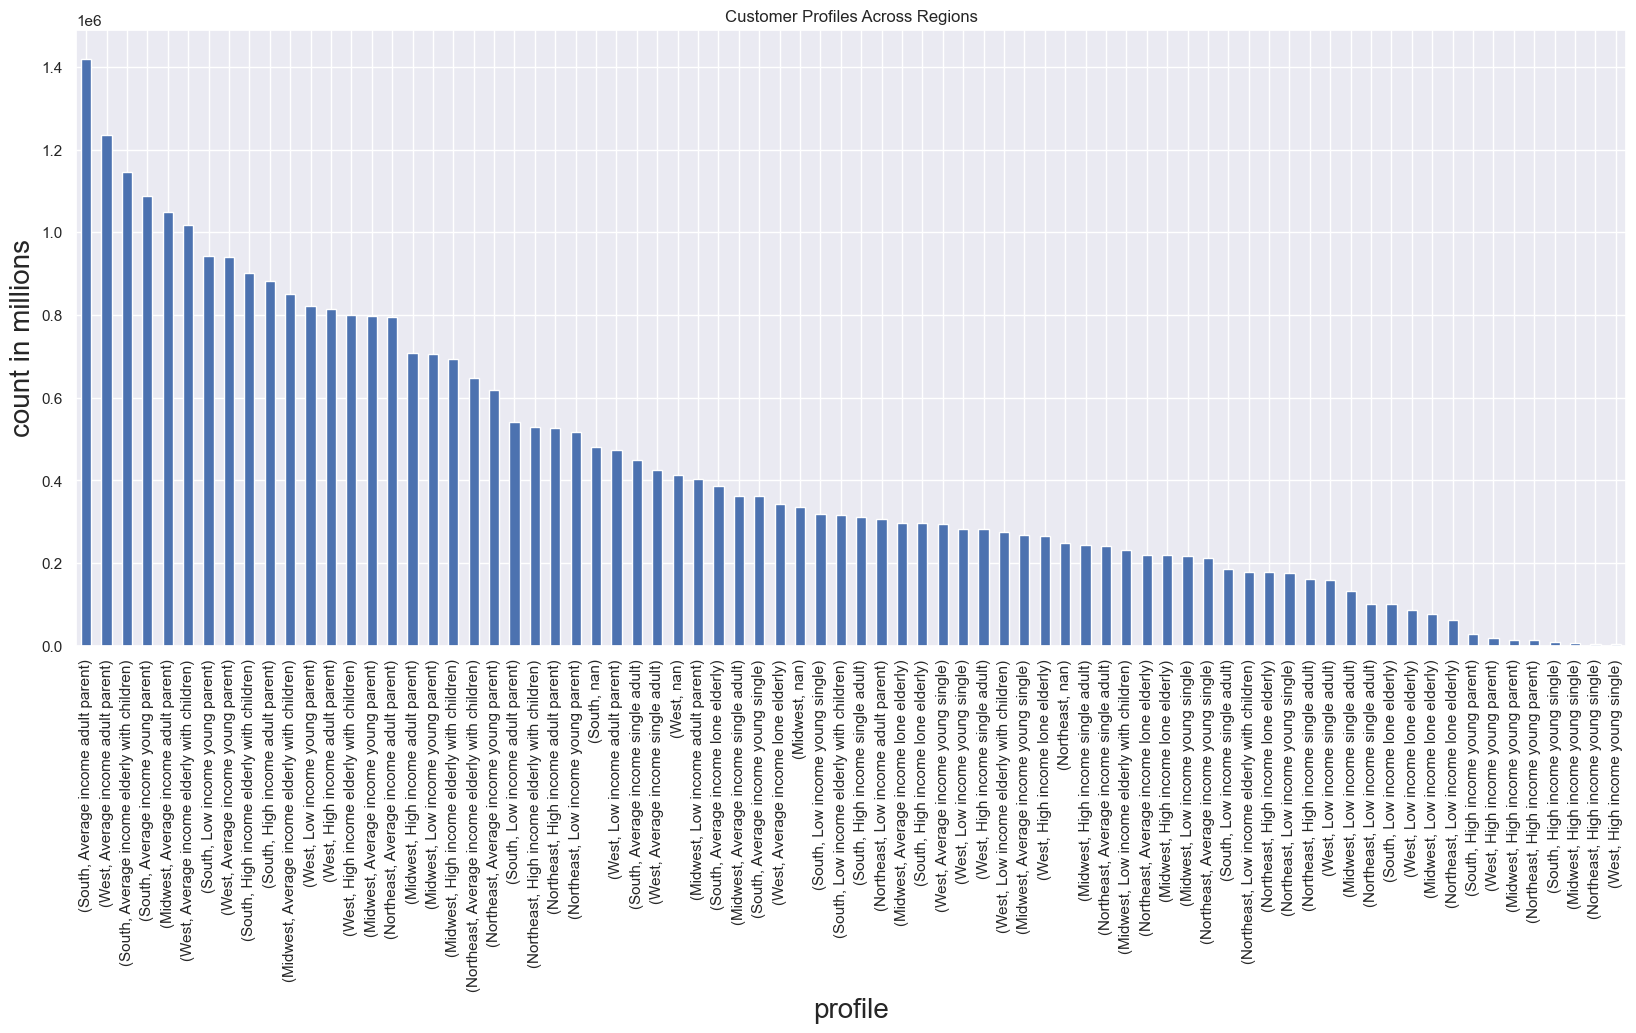

In [20]:
# Create a bar chart for customer profiles with Regions
region_profile.value_counts().plot.bar()
sns.set(rc = {'figure.figsize':(20,8)})
plt.xlabel("profile", fontsize=20)
plt.ylabel("count in millions", fontsize=20)
plt.title('Customer Profiles Across Regions')

As shown in the bar chart above, it's clear that the most common type of customer is a person living in the South of the US with an age between 36 and 60 years old, with at least one child and an average income.
The less common is a young person withouth children, having a high income and coming from the West Region of the US.

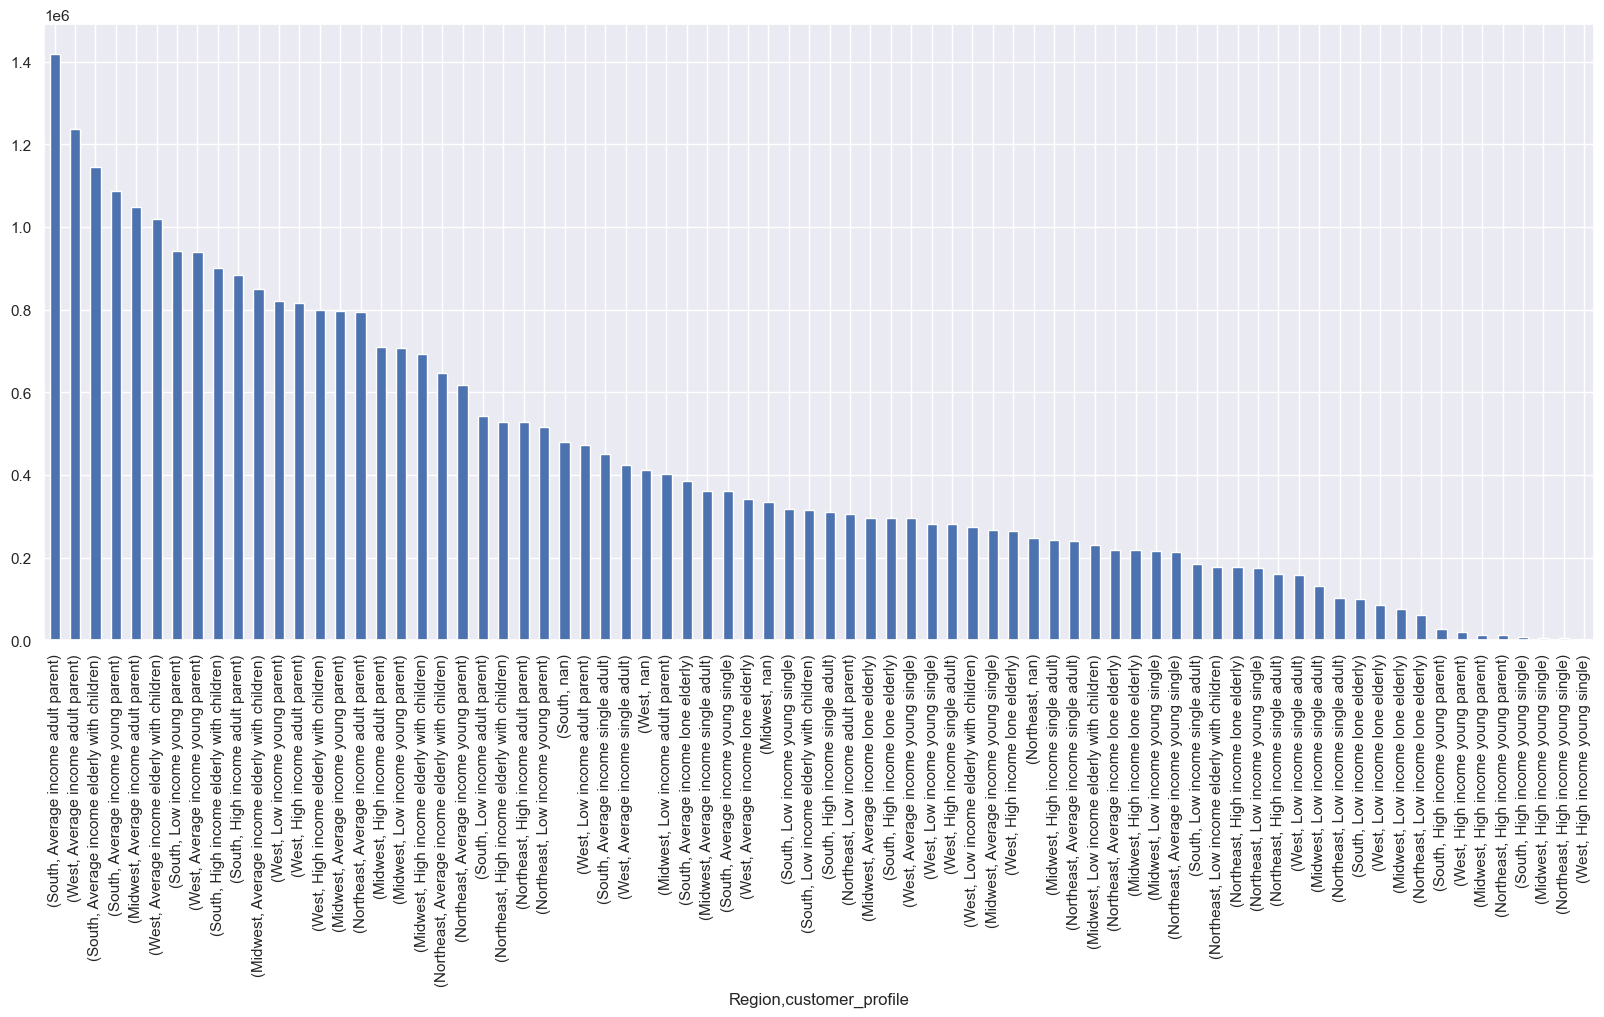

In [23]:
bar_region_profile = region_profile.value_counts().plot.bar()

In [25]:
# Export bar chart 
bar_region_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_profile.png'))

In [16]:
# Compare 'department_id' column with customer profiles created
department_profile = df_instacart_2[['department_id', 'user_id', 'order_id', 'customer_profile']]

In [27]:
# Check the result
department_profile.value_counts(dropna = False)

department_id  user_id  order_id  customer_profile                    
19             12182    2586686   Low income lone elderly                 76
18             153121   1726948   High income lone elderly                60
19             106247   3116052   Low income single adult                 54
               12833    1037729   Low income elderly with children        54
18             153121   1137470   High income lone elderly                51
                                                                          ..
11             56114    1055139   Average income elderly with children     1
                        3051682   Average income elderly with children     1
                        3324103   Average income elderly with children     1
               56117    2739580   Low income lone elderly                  1
21             99999    957130    Low income adult parent                  1
Name: count, Length: 15226303, dtype: int64

In [17]:
# Compare 'department_id' column with customer profiles created
department_profile_2 = df_instacart_2[['department_id','customer_profile']]

In [38]:
# Create a bar chart for customer profiles with departments
department_profile_2.value_counts().plot.bar()
sns.set(rc = {'figure.figsize':(50,50)})
sns.set(font_scale=5)
plt.xlabel("profile", fontsize=100)
plt.ylabel("count in millions", fontsize=100)
plt.title('Customer Profiles Across Departments')

Text(0.5, 1.0, 'Customer Profiles Across Departments')

Since there's so much data, it's impossible to distinguish the right information from the bar chart. However, taking a look at the result we obtained from the table created, it comes out that the most common department chosen by Instacart clients is 19, by Low income lone elderly people, followed by 18 preferred by high income lone elderly people. The less common department is 21, preferred by just one person, a low income adult parent. 

# 8. Export dataframes

In [18]:
# Export df_instacart_2 dataframe to pkl
df_instacart_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_data_2.pkl'))

In [19]:
# Export region_profile dataframe to pkl
region_profile.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'region_profile.pkl'))

In [20]:
# Export department_profile_2 dataframe to pkl
department_profile_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'region_profile.pkl'))